# Prepare dataset

In [1]:
# Import some necessary libraries

import pandas as pd
import numpy as np

df = pd.read_csv("data/train.csv", index_col="Unnamed: 0", parse_dates=["date"])
df.head()


,id,correct,date,naive_date_confidence,total,naive_total_confidence,text
0,4,True,2017-02-27 12:29:14,0.687667,6.74,0.667967,CRF-CITY LA ROCHELLE\n33 RUE DE LA SCIERIE\n17...
1,5,True,2017-02-26 11:10:32,0.689433,11.16,0.667933,city\nCRF-CITY LA ROCHELLE\n33 RUE DE LA SCIER...
2,6,True,2017-02-25 11:05:35,0.704167,6.99,0.668133,CRF-CITY LA ROCHELLE\n33 RUE DE LA SCIERIE\n17...
3,9,True,2016-05-23 12:29:03,0.697633,5.04,0.668100,CRF-CITY LA ROCHELLE\n33 RUE DE LA SCIERIE\n17...
4,10,True,2016-04-22 20:25:13,0.685633,14.46,0.667833,Carrefour\ncity\nCRF-CITY LA ROCHELLE\n33 RUE ...


In [10]:
df["date"] = [item.date() for item in df["date"]]

In [4]:
df["text"] = df["text"].apply(lambda x: x.replace("\n"," "))

In [5]:
df["text"][0:5]

/tmp/ipykernel_395/1253832740.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  df["text"][0:5]


0    CRF-CITY LA ROCHELLE 33 RUE DE LA SCIERIE 1700...
1    city CRF-CITY LA ROCHELLE 33 RUE DE LA SCIERIE...
2    CRF-CITY LA ROCHELLE 33 RUE DE LA SCIERIE 1700...
3    CRF-CITY LA ROCHELLE 33 RUE DE LA SCIERIE 1700...
4    Carrefour city CRF-CITY LA ROCHELLE 33 RUE DE ...
Name: text, dtype: object

In [ ]:
df["text"] = df["text"].apply(lambda x: x.split(" "))

In [9]:
print(df["text"][0])

['CRF-CITY', 'LA', 'ROCHELLE', '33', 'RUE', 'DE', 'LA', 'SCIERIE', '17000', 'LA', 'ROCHELLE', 'Tel', ':', '05.46.27.02.12', 'DESCRIPTION', 'QTE', 'MONTANT', '*85G', 'VERRINE', 'TIRANI', '2.01€', '*PARMENTIER', 'CANARD', '4.73€', '2', 'ARTICLE(S)', 'TOTAL', 'A', 'PAYER', '6.74€', 'CB', 'EMV', 'SANS', 'CONTACT', 'EUR', '6.74€', 'Si', 'vous', 'aviez', 'la', 'carte', 'fidélité,', 'vous', 'auriez', 'cumulé', '0.30€', 'sur', 'votre', 'compte', 'fidélité', 'Carrefour.', 'Détails:', 'Remise', 'produits', 'fide', '0.30€', '0006', '004', '000122', '27/02/2017', '12:24:45', 'MERCI', 'DE', 'VOTRE', 'VISITE', 'A', 'BIENTOT', '']


In [ ]:
# generate IOB tags for each word in the text



def generate_iob_tags(text, entities):
    tags = []
    for word in text:
        if word in entities:
            tags.append("B")
        else:
            tags.append("O")
    return tags

In [11]:
df.head()

,id,correct,date,naive_date_confidence,total,naive_total_confidence,text
0,4,True,2017-02-27,0.687667,6.74,0.667967,"[CRF-CITY, LA, ROCHELLE, 33, RUE, DE, LA, SCIE..."
1,5,True,2017-02-26,0.689433,11.16,0.667933,"[city, CRF-CITY, LA, ROCHELLE, 33, RUE, DE, LA..."
2,6,True,2017-02-25,0.704167,6.99,0.668133,"[CRF-CITY, LA, ROCHELLE, 33, RUE, DE, LA, SCIE..."
3,9,True,2016-05-23,0.697633,5.04,0.668100,"[CRF-CITY, LA, ROCHELLE, 33, RUE, DE, LA, SCIE..."
4,10,True,2016-04-22,0.685633,14.46,0.667833,"[Carrefour, city, CRF-CITY, LA, ROCHELLE, 33, ..."


In [12]:
df["text"][0].strip(" ")

'CRF-CITY LA ROCHELLE\n33 RUE DE LA SCIERIE\n17000 LA ROCHELLE\nTel : 05.46.27.02.12\nDESCRIPTION QTE MONTANT\n*85G VERRINE TIRANI 2.01€\n*PARMENTIER CANARD 4.73€\n2 ARTICLE(S) TOTAL A PAYER 6.74€\nCB EMV SANS CONTACT EUR 6.74€\nSi vous aviez la carte fidélité,\nvous auriez cumulé 0.30€ sur\nvotre compte fidélité Carrefour.\nDétails:\nRemise produits fide 0.30€\n0006 004 000122 27/02/2017 12:24:45\nMERCI DE VOTRE VISITE\nA BIENTOT\n'

In [1]:
from datasets import load_dataset
dataset = load_dataset("darentang/sroie", split="test")
labels = dataset.features['ner_tags'].feature.names
# labels

/home/jiaenliu/miniconda3/envs/receipt/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Extracting data files: 100%|██████████| 1/1 [00:03<00:00,  3.44s/it]
                                                                

Dataset sroie downloaded and prepared to /home/jiaenliu/.cache/huggingface/datasets/darentang___sroie/sroie/1.0.0/26ed9374c9a15a1d2f44fd8886f679076e1a1fd7da2d53726d6e58a99436c506. Subsequent calls will reuse this data.


In [3]:
print(labels)

['O', 'B-COMPANY', 'I-COMPANY', 'B-DATE', 'I-DATE', 'B-ADDRESS', 'I-ADDRESS', 'B-TOTAL', 'I-TOTAL']


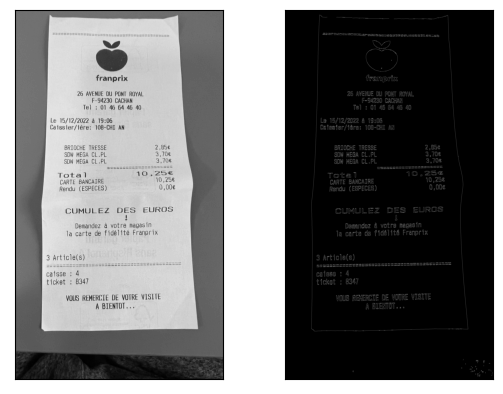

In [3]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
# import matplotlib.pyplot as plt
plt.rcParams["font.sans-serif"]=["SimHei"] #设置字体
plt.rcParams["axes.unicode_minus"]=False #该语句解决图像中的“-”负号的乱码问题
img = cv.imread('/home/jiaenliu/final_project/testimage/IMG_3633.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
edges = cv.Canny(img,100,200)
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.xticks([]), plt.yticks([])
plt.show()